## Big Data Bowl 2021

### Load and Pickle Data

#### Tracking Data 

In [1]:
import pandas as pd
import glob, os
import re
import pickle
import datetime as dt
from datetime import datetime

In [2]:
os.getcwd()

'C:\\Users\\lasha\\Downloads\\Big Data Bowl'

In [3]:
path = r'C:\Users\lasha\Downloads\Big Data Bowl'

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)

In [4]:
merged_df

,a,dir,dis,displayName,event,file,frameId,gameId,jerseyNumber,nflId,o,playDirection,playId,position,route,s,team,time,x,y
0,0.01,240.93,0.02,Matt Ryan,None,C:\Users\lasha\Downloads\Big Data Bowl\week1.csv,1,2018090600,2.0,310.0,289.57,left,75,QB,NaN,0.00,away,2018-09-07T01:07:14.599Z,91.73,26.67
1,0.01,66.66,0.01,Malcolm Jenkins,None,C:\Users\lasha\Downloads\Big Data Bowl\week1.csv,1,2018090600,27.0,79848.0,105.63,left,75,SS,NaN,0.01,home,2018-09-07T01:07:14.599Z,88.89,36.47
2,0.03,16.86,0.01,Julio Jones,None,C:\Users\lasha\Downloads\Big Data Bowl\week1.csv,1,2018090600,11.0,2495454.0,290.45,left,75,WR,HITCH,0.02,away,2018-09-07T01:07:14.599Z,91.35,44.16
3,0.42,168.91,0.01,Corey Graham,None,C:\Users\lasha\Downloads\Big Data Bowl\week1.csv,1,2018090600,24.0,2495613.0,70.12,left,75,FS,NaN,0.09,home,2018-09-07T01:07:14.599Z,86.31,22.01
4,0.00,193.97,0.00,Mohamed Sanu,None,C:\Users\lasha\Downloads\Big Data Bowl\week1.csv,1,2018090600,12.0,2533040.0,257.61,left,75,WR,HITCH,0.00,away,2018-09-07T01:07:14.599Z,90.78,36.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309383,1.28,336.24,0.28,Jayon Brown,None,C:\Users\lasha\Downloads\Big Data Bowl\week9.csv,123,2018110500,55.0,2558005.0,309.42,left,3845,ILB,NaN,2.75,away,2018-11-06T04:04:29.900Z,30.79,18.45
18309384,2.44,303.44,0.33,Adoree' Jackson,None,C:\Users\lasha\Downloads\Big Data Bowl\week9.csv,123,2018110500,25.0,2558065.0,220.70,left,3845,CB,NaN,2.32,away,2018-11-06T04:04:29.900Z,-1.22,37.05
18309385,0.24,33.88,0.12,Blake Jarwin,None,C:\Users\lasha\Downloads\Big Data Bowl\week9.csv,123,2018110500,89.0,2559193.0,331.53,left,3845,TE,POST,1.14,home,2018-11-06T04:04:29.900Z,8.24,12.37
18309386,0.44,45.83,0.04,Sharif Finch,None,C:\Users\lasha\Downloads\Big Data Bowl\week9.csv,123,2018110500,56.0,2561328.0,304.83,left,3845,OLB,NaN,0.45,away,2018-11-06T04:04:29.900Z,36.70,7.06


#### Players

In [5]:
players = pd.read_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\players.csv')

In [6]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,9/10/1990,Washington,CB,Desmond Trufant
1,2539653,70,186,11/1/1988,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,12/18/1991,Purdue,SS,Ricardo Allen
3,2555162,73,227,11/4/1994,Louisiana State,MLB,Deion Jones
4,2555255,75,232,7/1/1993,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,9/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,5/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,4/25/1992,Oregon State,QB,Sean Mannion
1301,2561469,69,187,3/15/1993,Alabama-Birmingham,CB,Darious Williams


In [7]:
#fix height
players['height'] = players.height.str.replace('-','*12+')
players['height'] = players.height.apply(lambda x: eval(x))
players['height'].value_counts()

73    221
74    183
75    161
71    154
72    153
76    115
70    113
77     78
69     46
78     39
68     19
79     11
67      4
80      3
66      3
Name: height, dtype: int64

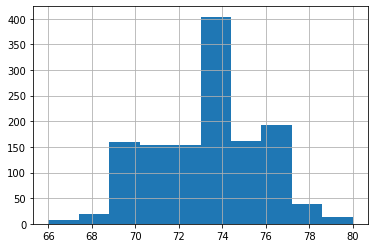

In [13]:
players['height'].hist()

In [8]:
#add age at start of 2018
players['birthDate'] = pd.to_datetime(players['birthDate'])

In [9]:
season_start = pd.to_datetime('09-06-2018')
# season_start
players['age'] = (season_start - players['birthDate']).astype('<m8[Y]')

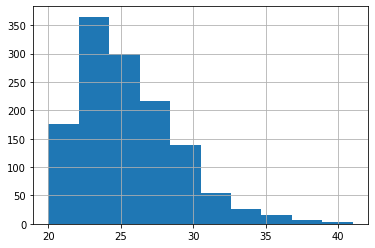

In [14]:
players['age'].hist()

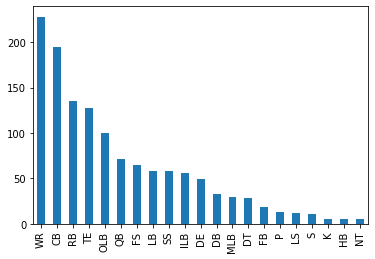

In [94]:
players['position'].value_counts().plot(kind='bar')

In [73]:
#abbreviate display name (to match plays)
players['name_abbrev'] = players['displayName'].replace(r'(?<=\w)\w+\s', value = '.', regex = True)

In [74]:
players['name_abbrev']

0           D.Trufant
1            R.Alford
2             R.Allen
3             D.Jones
4       De'V.Campbell
            ...      
1298           A.East
1299      M.McCaffrey
1300        S.Mannion
1301       D.Williams
1302          M.Dupre
Name: name_abbrev, Length: 1303, dtype: object

In [106]:
players.to_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\players_edit.csv')

#### Games

In [75]:
games = pd.read_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\games.csv')

In [76]:
games

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


In [77]:
games['gameDate']= pd.to_datetime(games['gameDate'])

In [78]:
games['gameTimeEastern'] = pd.to_datetime(games['gameTimeEastern'])

In [79]:
games['gameTimeEastern'] = [dt.datetime.time(d) for d in games['gameTimeEastern']] 

In [80]:
games

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,2018-12-30,16:25:00,DEN,LAC,17
249,2018123015,2018-12-30,16:25:00,SEA,ARI,17
250,2018123014,2018-12-30,16:25:00,LA,SF,17
251,2018122200,2018-12-22,16:30:00,TEN,WAS,16


In [105]:
games.to_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\games_edit.csv',index=False)

In [97]:
#merge into merged_df by game id
merged_df = merged_df.merge(games,how='left',on=['gameId'])

In [103]:
merged_df = merged_df.drop(['file'],axis=1)

,a,dir,dis,displayName,event,frameId,gameId,jerseyNumber,nflId,o,...,s,team,time,x,y,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,0.01,240.93,0.02,Matt Ryan,None,1,2018090600,2.0,310.0,289.57,...,0.00,away,2018-09-07T01:07:14.599Z,91.73,26.67,2018-09-06,20:20:00,PHI,ATL,1
1,0.01,66.66,0.01,Malcolm Jenkins,None,1,2018090600,27.0,79848.0,105.63,...,0.01,home,2018-09-07T01:07:14.599Z,88.89,36.47,2018-09-06,20:20:00,PHI,ATL,1
2,0.03,16.86,0.01,Julio Jones,None,1,2018090600,11.0,2495454.0,290.45,...,0.02,away,2018-09-07T01:07:14.599Z,91.35,44.16,2018-09-06,20:20:00,PHI,ATL,1
3,0.42,168.91,0.01,Corey Graham,None,1,2018090600,24.0,2495613.0,70.12,...,0.09,home,2018-09-07T01:07:14.599Z,86.31,22.01,2018-09-06,20:20:00,PHI,ATL,1
4,0.00,193.97,0.00,Mohamed Sanu,None,1,2018090600,12.0,2533040.0,257.61,...,0.00,away,2018-09-07T01:07:14.599Z,90.78,36.15,2018-09-06,20:20:00,PHI,ATL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309383,1.28,336.24,0.28,Jayon Brown,None,123,2018110500,55.0,2558005.0,309.42,...,2.75,away,2018-11-06T04:04:29.900Z,30.79,18.45,2018-11-05,20:15:00,DAL,TEN,9
18309384,2.44,303.44,0.33,Adoree' Jackson,None,123,2018110500,25.0,2558065.0,220.70,...,2.32,away,2018-11-06T04:04:29.900Z,-1.22,37.05,2018-11-05,20:15:00,DAL,TEN,9
18309385,0.24,33.88,0.12,Blake Jarwin,None,123,2018110500,89.0,2559193.0,331.53,...,1.14,home,2018-11-06T04:04:29.900Z,8.24,12.37,2018-11-05,20:15:00,DAL,TEN,9
18309386,0.44,45.83,0.04,Sharif Finch,None,123,2018110500,56.0,2561328.0,304.83,...,0.45,away,2018-11-06T04:04:29.900Z,36.70,7.06,2018-11-05,20:15:00,DAL,TEN,9


In [ ]:
merged_df.head()

In [104]:
#pickle df to load later
pickle.dump(merged_df, open( "save.p", "wb" ) )

#### Plays

In [81]:
plays = pd.read_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\plays.csv')

In [82]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [83]:
plays['playType'].value_counts()

play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64

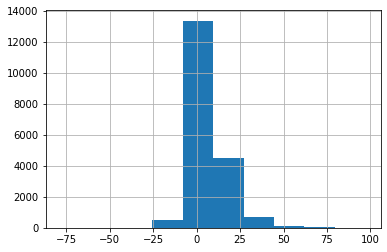

In [84]:
plays['playResult'].hist()

In [85]:
plays['penaltyCodes'].value_counts()

DPI        242
DH         241
RPS        104
OPI         96
OH          94
          ... 
DH;ICT       1
DSQ          1
IBW;OH       1
OH;OH        1
UNRd;DH      1
Name: penaltyCodes, Length: 86, dtype: int64

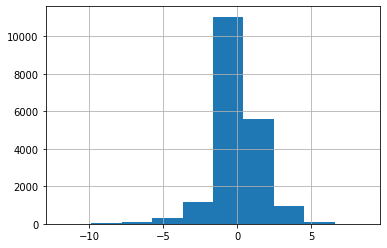

In [89]:
plays['epa'].hist()

In [96]:
plays['quarter'].value_counts() #5= overtime

2    5508
4    5294
3    4266
1    3999
5     172
Name: quarter, dtype: int64

### Coverage

In [107]:
cov = pd.read_csv('C:\\Users\\lasha\\Downloads\\Big Data Bowl\\other\\coverages_week1.csv')

In [108]:
cov

,gameId,playId,coverage
0,2018091000,1101,Cover 1 Man
1,2018091000,1005,Cover 1 Man
2,2018091000,287,Cover 1 Man
3,2018091000,3151,Cover 2 Zone
4,2018091000,1029,Cover 2 Zone
...,...,...,...
1023,2018090903,1971,Cover 1 Man
1024,2018090903,1947,Cover 1 Man
1025,2018090903,2453,Cover 6 Zone
1026,2018090903,194,Cover 1 Man


In [123]:
cov['coverage'].value_counts()

Cover 3 Zone    352
Cover 1 Man     296
Cover 4 Zone    152
Cover 2 Zone    113
Cover 6 Zone     69
Cover 2 Man      32
Cover 0 Man      13
Prevent Zone      1
Name: coverage, dtype: int64

In [109]:
week1 = merged_df[merged_df['week']==1]

In [115]:
plays_snip = plays[['gameId','playId','defendersInTheBox','numberOfPassRushers','personnelD']]

In [ ]:
# plays_snip = plays[['gameId','playId','offenseFormation','personnelO','defendersInTheBox','numberOfPassRushers',
#                     'personnelD','offensePlayResult','epa','score_bin']]

In [116]:
plays_snip.head()

,gameId,playId,defendersInTheBox,numberOfPassRushers,personnelD
0,2018090600,75,7.0,4.0,"4 DL, 2 LB, 5 DB"
1,2018090600,146,7.0,4.0,"4 DL, 2 LB, 5 DB"
2,2018090600,168,6.0,4.0,"4 DL, 2 LB, 5 DB"
3,2018090600,190,6.0,5.0,"4 DL, 1 LB, 6 DB"
4,2018090600,256,8.0,6.0,"6 DL, 3 LB, 2 DB"


In [118]:
cov2 = cov.merge(plays_snip, how='left', on=['gameId','playId'])

In [119]:
cov2

,gameId,playId,coverage,defendersInTheBox,numberOfPassRushers,personnelD
0,2018091000,1101,Cover 1 Man,6.0,3.0,"3 DL, 3 LB, 5 DB"
1,2018091000,1005,Cover 1 Man,6.0,4.0,"3 DL, 3 LB, 5 DB"
2,2018091000,287,Cover 1 Man,8.0,4.0,"3 DL, 3 LB, 5 DB"
3,2018091000,3151,Cover 2 Zone,5.0,4.0,"3 DL, 3 LB, 5 DB"
4,2018091000,1029,Cover 2 Zone,6.0,4.0,"3 DL, 3 LB, 5 DB"
...,...,...,...,...,...,...
1023,2018090903,1971,Cover 1 Man,7.0,4.0,"1 DL, 5 LB, 5 DB"
1024,2018090903,1947,Cover 1 Man,7.0,4.0,"2 DL, 4 LB, 5 DB"
1025,2018090903,2453,Cover 6 Zone,7.0,4.0,"2 DL, 4 LB, 5 DB"
1026,2018090903,194,Cover 1 Man,7.0,3.0,"4 DL, 2 LB, 5 DB"


In [141]:
#cov2[cov2['coverage']=='Cover 1 Man']['personnelD'].value_counts()

In [138]:
piv = pd.pivot_table(cov2, index=['coverage','personnelD'],values=['defendersInTheBox','numberOfPassRushers']).reset_index()

In [139]:
piv

,coverage,personnelD,defendersInTheBox,numberOfPassRushers
0,Cover 0 Man,"3 DL, 3 LB, 5 DB",7.000000,8.000000
1,Cover 0 Man,"3 DL, 4 LB, 4 DB",8.000000,6.000000
2,Cover 0 Man,"4 DL, 1 LB, 6 DB",6.500000,5.500000
3,Cover 0 Man,"4 DL, 2 LB, 5 DB",7.250000,5.500000
4,Cover 0 Man,"4 DL, 3 LB, 4 DB",7.000000,5.000000
...,...,...,...,...
69,Cover 6 Zone,"3 DL, 4 LB, 4 DB",6.800000,4.000000
70,Cover 6 Zone,"4 DL, 1 LB, 6 DB",3.000000,4.000000
71,Cover 6 Zone,"4 DL, 2 LB, 5 DB",5.952381,3.904762
72,Cover 6 Zone,"4 DL, 3 LB, 4 DB",6.777778,4.250000


In [146]:
piv[piv['coverage']=='Cover 0 Man']

,coverage,personnelD,defendersInTheBox,numberOfPassRushers
0,Cover 0 Man,"3 DL, 3 LB, 5 DB",7.00,8.0
1,Cover 0 Man,"3 DL, 4 LB, 4 DB",8.00,6.0
2,Cover 0 Man,"4 DL, 1 LB, 6 DB",6.50,5.5
3,Cover 0 Man,"4 DL, 2 LB, 5 DB",7.25,5.5
4,Cover 0 Man,"4 DL, 3 LB, 4 DB",7.00,5.0
5,Cover 0 Man,"5 DL, 3 LB, 3 DB",10.00,7.0
6,Cover 0 Man,"6 DL, 3 LB, 2 DB",8.00,6.0


In [142]:
piv[piv['coverage']=='Cover 1 Man']

,coverage,personnelD,defendersInTheBox,numberOfPassRushers
7,Cover 1 Man,"0 DL, 5 LB, 6 DB",6.500000,5.000000
8,Cover 1 Man,"0 DL, 6 LB, 5 DB",7.000000,6.000000
9,Cover 1 Man,"1 DL, 3 LB, 7 DB",5.000000,4.000000
10,Cover 1 Man,"1 DL, 4 LB, 6 DB",5.000000,5.000000
11,Cover 1 Man,"1 DL, 5 LB, 5 DB",6.714286,4.857143
12,Cover 1 Man,"2 DL, 3 LB, 6 DB",5.500000,4.473684
13,Cover 1 Man,"2 DL, 4 LB, 5 DB",6.312500,4.483871
14,Cover 1 Man,"3 DL, 2 LB, 6 DB",5.666667,3.833333
15,Cover 1 Man,"3 DL, 3 LB, 5 DB",6.353846,4.476190
16,Cover 1 Man,"3 DL, 4 LB, 4 DB",6.866667,5.000000
